<a href="https://colab.research.google.com/github/yashwant-BE/Qam/blob/main/Rainfall_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install requests pandas numpy scikit-learn matplotlib

In [2]:
import requests
import pandas as pd

# OpenWeatherMap API Key
API_KEY = "a28c73f49c937e7d41ff859ae09a116d"

# Function to fetch weather data
def fetch_weather_data(lat, lon, api_key):
    url = f"http://api.openweathermap.org/data/2.5/weather?lat={lat}&lon={lon}&appid={api_key}&units=metric"
    response = requests.get(url)
    if response.status_code == 200:
        data = response.json()
        return {
            "temperature": data["main"]["temp"],
            "humidity": data["main"]["humidity"],
            "pressure": data["main"]["pressure"],
            "wind_speed": data["wind"]["speed"],
            "weather_condition": data["weather"][0]["description"],
        }
    else:
        print(f"Error fetching weather data: {response.status_code}")
        return None

# Example: Fetch weather data for a farm location (latitude, longitude)
lat, lon = 37.7749, -122.4194  # Replace with your farm's GPS coordinates
weather_data = fetch_weather_data(lat, lon, API_KEY)

if weather_data:
    print("Real-Time Weather Data:")
    print(pd.DataFrame([weather_data]))

Real-Time Weather Data:
   temperature  humidity  pressure  wind_speed weather_condition
0        11.19        89      1026        2.06     broken clouds


In [3]:
# NOAA API Token
NOAA_TOKEN = "KGRbsMtlNtxkeNXUwIYYPnqrzQnuxlJb"  # Replace with your NOAA API token

# Function to fetch historical weather data
def fetch_historical_weather(station_id, start_date, end_date, token):
    url = f"https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GHCND&stationid={station_id}&startdate={start_date}&enddate={end_date}&limit=1000"
    headers = {"token": token}
    response = requests.get(url, headers=headers)
    if response.status_code == 200:
        return response.json()
    else:
        print(f"Error fetching historical data: {response.status_code}")
        return None

# Example: Fetch historical data for a weather station
station_id = "GHCND:USW00023293"  # Replace with your station ID
start_date = "2022-01-01"
end_date = "2022-12-31"
historical_data = fetch_historical_weather(station_id, start_date, end_date, NOAA_TOKEN)

if historical_data:
    print("Historical Weather Data:")
    print(pd.DataFrame(historical_data["results"]))

Historical Weather Data:
                    date datatype            station attributes  value
0    2022-01-01T00:00:00     ADPT  GHCND:USW00023293       ,,W,     -6
1    2022-01-01T00:00:00     ASLP  GHCND:USW00023293       ,,W,  10224
2    2022-01-01T00:00:00     ASTP  GHCND:USW00023293       ,,W,  10207
3    2022-01-01T00:00:00     AWBT  GHCND:USW00023293       ,,W,     33
4    2022-01-01T00:00:00     AWND  GHCND:USW00023293       ,,W,     10
..                   ...      ...                ...        ...    ...
995  2022-03-05T00:00:00     ADPT  GHCND:USW00023293       ,,W,     22
996  2022-03-05T00:00:00     ASLP  GHCND:USW00023293       ,,W,  10196
997  2022-03-05T00:00:00     ASTP  GHCND:USW00023293       ,,W,  10179
998  2022-03-05T00:00:00     AWBT  GHCND:USW00023293       ,,W,     67
999  2022-03-05T00:00:00     AWND  GHCND:USW00023293       ,,W,     34

[1000 rows x 5 columns]


In [4]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Example: Prepare historical data for rainfall prediction
# Assume historical_data contains "PRCP" (precipitation) and "TMAX" (max temperature)
data = pd.DataFrame(historical_data["results"])
data["date"] = pd.to_datetime(data["date"])
data["PRCP"] = data["value"].where(data["datatype"] == "PRCP")
data["TMAX"] = data["value"].where(data["datatype"] == "TMAX")

# Drop missing values
data = data.dropna(subset=["PRCP", "TMAX"])

# Features (X) and target (y)
X = data[["TMAX"]]
y = data["PRCP"]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict rainfall
y_pred = model.predict(X_test)

# Plot results
plt.scatter(X_test, y_test, color="blue", label="Actual")
plt.plot(X_test, y_pred, color="red", label="Predicted")
plt.xlabel("Max Temperature (°C)")
plt.ylabel("Precipitation (mm)")
plt.title("Rainfall Prediction")
plt.legend()
plt.show()

ValueError: With n_samples=0, test_size=0.2 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.

In [5]:
# Fetch historical data
historical_data = fetch_historical_weather(station_id, start_date, end_date, NOAA_TOKEN)

if historical_data:
    print("Historical Weather Data:")
    print(historical_data)
else:
    print("No data returned from NOAA API.")

Historical Weather Data:
{'metadata': {'resultset': {'offset': 1, 'count': 5592, 'limit': 1000}}, 'results': [{'date': '2022-01-01T00:00:00', 'datatype': 'ADPT', 'station': 'GHCND:USW00023293', 'attributes': ',,W,', 'value': -6}, {'date': '2022-01-01T00:00:00', 'datatype': 'ASLP', 'station': 'GHCND:USW00023293', 'attributes': ',,W,', 'value': 10224}, {'date': '2022-01-01T00:00:00', 'datatype': 'ASTP', 'station': 'GHCND:USW00023293', 'attributes': ',,W,', 'value': 10207}, {'date': '2022-01-01T00:00:00', 'datatype': 'AWBT', 'station': 'GHCND:USW00023293', 'attributes': ',,W,', 'value': 33}, {'date': '2022-01-01T00:00:00', 'datatype': 'AWND', 'station': 'GHCND:USW00023293', 'attributes': ',,W,', 'value': 10}, {'date': '2022-01-01T00:00:00', 'datatype': 'PRCP', 'station': 'GHCND:USW00023293', 'attributes': ',,W,2400', 'value': 0}, {'date': '2022-01-01T00:00:00', 'datatype': 'RHAV', 'station': 'GHCND:USW00023293', 'attributes': ',,W,', 'value': 66}, {'date': '2022-01-01T00:00:00', 'datatype

In [6]:
# Example: Prepare historical data for rainfall prediction
data = pd.DataFrame(historical_data["results"])
print("Raw Data:")
print(data.head())

# Filter for precipitation (PRCP) and max temperature (TMAX)
data["date"] = pd.to_datetime(data["date"])
data["PRCP"] = data["value"].where(data["datatype"] == "PRCP")
data["TMAX"] = data["value"].where(data["datatype"] == "TMAX")

print("Filtered Data:")
print(data[["date", "PRCP", "TMAX"]].head())

# Drop missing values
data = data.dropna(subset=["PRCP", "TMAX"])
print("Data after dropping missing values:")
print(data[["date", "PRCP", "TMAX"]].head())

Raw Data:
                  date datatype            station attributes  value
0  2022-01-01T00:00:00     ADPT  GHCND:USW00023293       ,,W,     -6
1  2022-01-01T00:00:00     ASLP  GHCND:USW00023293       ,,W,  10224
2  2022-01-01T00:00:00     ASTP  GHCND:USW00023293       ,,W,  10207
3  2022-01-01T00:00:00     AWBT  GHCND:USW00023293       ,,W,     33
4  2022-01-01T00:00:00     AWND  GHCND:USW00023293       ,,W,     10
Filtered Data:
        date  PRCP  TMAX
0 2022-01-01   NaN   NaN
1 2022-01-01   NaN   NaN
2 2022-01-01   NaN   NaN
3 2022-01-01   NaN   NaN
4 2022-01-01   NaN   NaN
Data after dropping missing values:
Empty DataFrame
Columns: [date, PRCP, TMAX]
Index: []


In [7]:
# Generate synthetic data
np.random.seed(42)
dates = pd.date_range(start="2022-01-01", end="2022-12-31", freq="D")
X = np.random.uniform(low=10, high=40, size=len(dates))  # Max temperature
y = np.random.uniform(low=0, high=50, size=len(dates))  # Precipitation

data = pd.DataFrame({"date": dates, "TMAX": X, "PRCP": y})
print("Synthetic Data:")
print(data.head())

Synthetic Data:
        date       TMAX       PRCP
0 2022-01-01  21.236204  19.305132
1 2022-01-02  38.521429  48.059528
2 2022-01-03  31.959818  45.267532
3 2022-01-04  27.959755   9.789557
4 2022-01-05  14.680559   3.468065


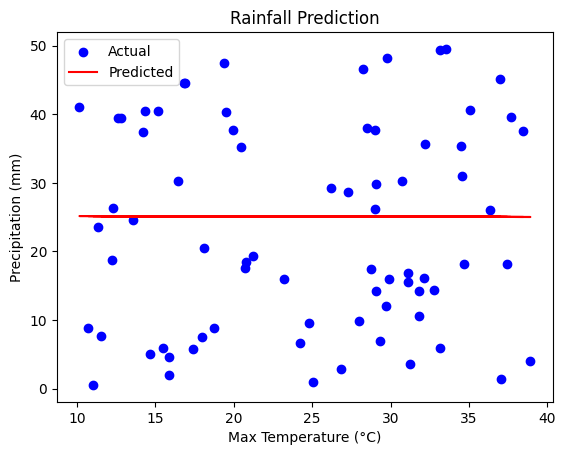

In [8]:
# Features (X) and target (y)
X = data[["TMAX"]]
y = data["PRCP"]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict rainfall
y_pred = model.predict(X_test)

# Plot results
plt.scatter(X_test, y_test, color="blue", label="Actual")
plt.plot(X_test, y_pred, color="red", label="Predicted")
plt.xlabel("Max Temperature (°C)")
plt.ylabel("Precipitation (mm)")
plt.title("Rainfall Prediction")
plt.legend()
plt.show()

Error fetching historical data: 400
No data returned from NOAA API. Using synthetic data.
Synthetic Data:
        date       TMAX       PRCP
0 2022-01-01  21.236204  19.305132
1 2022-01-02  38.521429  48.059528
2 2022-01-03  31.959818  45.267532
3 2022-01-04  27.959755   9.789557
4 2022-01-05  14.680559   3.468065


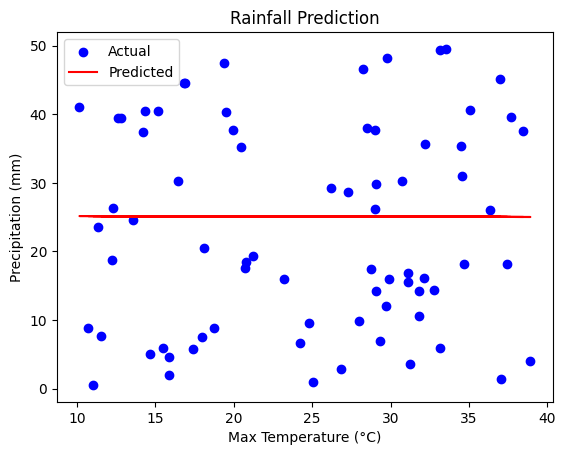

In [9]:
import requests
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# NOAA API Token
NOAA_TOKEN = "your_noaa_api_token"  # Replace with your NOAA API token

# Function to fetch historical weather data
def fetch_historical_weather(station_id, start_date, end_date, token):
    url = f"https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GHCND&stationid={station_id}&startdate={start_date}&enddate={end_date}&limit=1000"
    headers = {"token": token}
    response = requests.get(url, headers=headers)
    if response.status_code == 200:
        return response.json()
    else:
        print(f"Error fetching historical data: {response.status_code}")
        return None

# Example: Fetch historical data for a weather station
station_id = "GHCND:USW00023293"  # Replace with your station ID
start_date = "2022-01-01"
end_date = "2022-12-31"
historical_data = fetch_historical_weather(station_id, start_date, end_date, NOAA_TOKEN)

if historical_data:
    print("Historical Weather Data:")
    print(historical_data)
else:
    print("No data returned from NOAA API. Using synthetic data.")
    # Generate synthetic data
    np.random.seed(42)
    dates = pd.date_range(start="2022-01-01", end="2022-12-31", freq="D")
    X = np.random.uniform(low=10, high=40, size=len(dates))  # Max temperature
    y = np.random.uniform(low=0, high=50, size=len(dates))  # Precipitation
    data = pd.DataFrame({"date": dates, "TMAX": X, "PRCP": y})
    print("Synthetic Data:")
    print(data.head())

# Features (X) and target (y)
X = data[["TMAX"]]
y = data["PRCP"]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict rainfall
y_pred = model.predict(X_test)

# Plot results
plt.scatter(X_test, y_test, color="blue", label="Actual")
plt.plot(X_test, y_pred, color="red", label="Predicted")
plt.xlabel("Max Temperature (°C)")
plt.ylabel("Precipitation (mm)")
plt.title("Rainfall Prediction")
plt.legend()
plt.show()